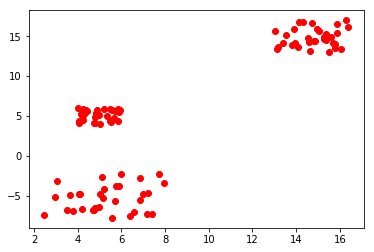

In [1]:
import pandas as pn
import numpy as np
import math
import random as rand
import matplotlib.pyplot as plt
%matplotlib inline


# Reading input
data = pn.read_csv("clustering1.csv", header=None)
data = np.asarray(data)


X = data[:,:data.shape[1]]



# Plotting

color = ['red']
plt.scatter( X[:,0], X[:,1], c = color)

In [2]:
# Euclidean Distance
def dist(a, b):
    
    res = ((a[0] - b[0]) ** 2) + ((a[1] - b[1]) ** 2)
    return math.sqrt (res)



------------------------- With Random ------------------------


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


IndexError: too many indices for array

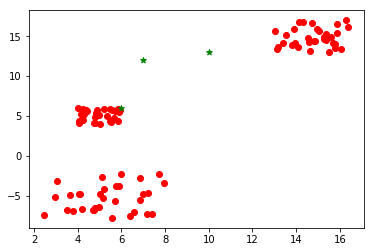

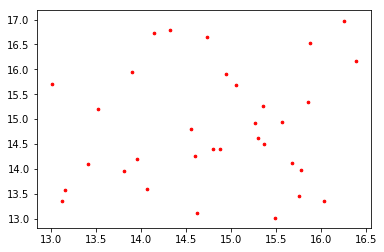

In [3]:
# K - means
#def K_means(points, k):

points = X
k = 3

f1 = points[:,0]
f2 = points[:,1]
points = np.array(list(zip(f1, f2)))

    
# Assigning random values
C_x = np.random.randint(0, np.max(points), size = k)
C_y = np.random.randint(0, np.max(points), size = k)

C = np.array(list(zip(C_x, C_y)), dtype = np.float32)


print ("------------------------- With Random ------------------------")
# Plotting along with the Centroids
plt.scatter(f1, f2, c='red')
plt.scatter(C_x, C_y, marker='*', c='g')


C_old = np.zeros(C.shape)
    
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(points))
    
    
# Error func. - Distance between new centroids and old centroids
errorN = []
for i in range (0, k):  
    errori = dist(C[i], C_old[i])
    errorN.insert(i, errori)

error = sum(errorN)/k

while error != 0:
    
    # Assigning each value to its closest cluster
    for i in range(len(points)):

        distanceN = []
        for j in range (0, k):
            distanceN.insert(j, dist(points[i], C[j]) )

        MinDist = min(distanceN)
        minIndex = 0

        for j in range (0, k):
            if distanceN[j] == MinDist:
                minIndex = j


        #clusters = the minimum distance between the three
        clusters[i] = minIndex
        #print (minIndex)
        


    C_old = C

    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [points[j] for j in range(len(points)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
        
    #print (clusters)


    for i in range (0, k):  
        errori = dist(C[i], C_old[i])
        errorN.insert(i, errori)

    error = sum(errorN)/k
    

    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    fig, ax = plt.subplots()
    
    for i in range(k):
            points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
            ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')




In [40]:
distanceN = []

for j in range (0, k):
    distanceN.insert(j, dist(points[0], C[j]) )
    print (distanceN[j])

MinDist = min(distanceN)
minIndex = 0

for j in range (0, k):
    if distanceN[j] == MinDist:
        minIndex = j

print (minIndex)

15.708667442179967
9.651708182334886
10.23955526990591
1
